In [90]:
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
# from matplotlib.legend_handler import HandlerTuple

import json
from glob import glob

# from uncertainties import unumpy as unp
# from uncertainties import ufloat, umath

from options import *
from constants import *

# nom_vals = unp.nominal_values
# std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [78]:
#Paramètres utilisés pour la mesure (par défaut)
sampleRate = 2.048e6
centerFreq = 1420e6
centerFreqGHz = centerFreq / 1e9
nfft = 1024

In [91]:
Ra = []
Dec = []
power = []
frequencies = []
properties = []
for run in glob('../data/*'):
    if (run[8:].startswith("calibration") and run.endswith(".dat")):
        print(run)
        Ra.append(int(run.split("_")[1]))
        Dec.append(int(run.split("_")[2]))
        run_data = np.fromfile(run, np.complex64)
        p,f = mlab.psd(run_data, Fs=sampleRate, NFFT=nfft, scale_by_freq=False) # faut decaler les frequences par fc
        power.append(p)
        frequencies.append(f + centerFreq)

        with open(run.replace("raw.dat", "params.json"), "r") as file:
            properties.append(json.load(file))


../data/calibration_0_-5_2025_02_21_16_03_06_raw.dat
../data/calibration_0_-4_2025_02_21_15_49_45_raw.dat
../data/calibration_1_-2_2025_02_21_15_38_49_raw.dat
../data/calibration_5_-4_2025_02_21_15_54_56_raw.dat
../data/calibration_3_-2_2025_02_21_15_40_42_raw.dat
../data/calibration_1_-4_2025_02_21_15_50_46_raw.dat
../data/calibration_0_0_2025_02_21_15_23_20_raw.dat
../data/calibration_5_-1_2025_02_21_15_31_02_raw.dat
../data/calibration_4_-2_2025_02_21_15_41_45_raw.dat
../data/calibration_2_0_2025_02_21_15_26_03_raw.dat
../data/calibration_5_-2_2025_02_21_15_42_43_raw.dat
../data/calibration_5_0_2025_02_21_15_29_55_raw.dat
../data/calibration_4_-3_2025_02_21_15_44_34_raw.dat
../data/calibration_2_-1_2025_02_21_15_34_18_raw.dat
../data/calibration_1_-5_2025_02_21_16_01_49_raw.dat
../data/calibration_4_-1_2025_02_21_15_32_15_raw.dat
../data/calibration_4_-4_2025_02_21_15_54_02_raw.dat
../data/calibration_3_-4_2025_02_21_15_53_03_raw.dat
../data/calibration_4_-5_2025_02_21_15_57_55_raw.

In [94]:
az = []
alt =[]
for i, prop in enumerate(properties):
    az_t, alt_t = prop["az_alt"]
    az.append(az_t)
    alt.append(alt_t)

In [80]:
avg = []
for i, f in enumerate(frequencies):
    left_avg = np.mean(power[i][200:500])
    right_avg = np.mean(power[i][550:850])
    avg.append((left_avg + right_avg)/2)


In [97]:
print(Ra)
print(Dec)

[0, 0, 1, 5, 3, 1, 0, 5, 4, 2, 5, 5, 4, 2, 1, 4, 4, 3, 4, 0, 0, 2, 1, 3, 3, 2, 2, 4, 5, 5, 3, 3, 2, 1, 1, 0]
[-5, -4, -2, -4, -2, -4, 0, -1, -2, 0, -2, 0, -3, -1, -5, -1, -4, -4, -5, -1, -2, -2, -3, -1, -3, -3, -5, 0, -3, -5, 0, -5, -4, -1, 0, -3]


Text(0, 0.5, 'Alt')

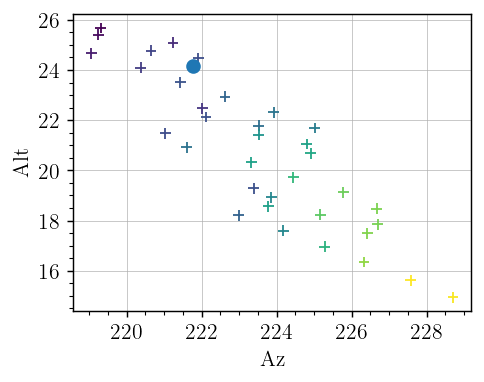

In [102]:
plt.scatter(az, alt, c=avg)
plt.scatter(az[6], alt[6], marker='o', s=50)
plt.xlabel("Az")
plt.ylabel("Alt")

Text(0, 0.5, 'Dec')

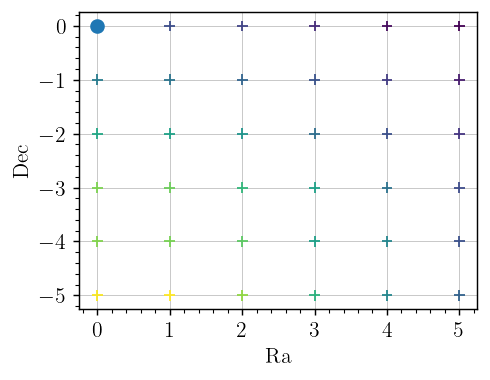

In [ ]:
plt.scatter(Ra, Dec, c=avg)
plt.scatter(Ra[6], Dec[6], marker='o', s=50)
plt.xlabel("Ra")
plt.ylabel("Dec")